In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from datetime import datetime
print(check_output(["ls", "../input"]).decode("utf8"))

crimeanalytics.md
detroit-311.csv
detroit-blight-violations.csv
detroit-crime.csv
detroit-demolition-permits.tsv
ouput.txt
outputcd2.csv
outputcd.csv
output.csv
output_pop.csv
sample_submission.csv
sanfrancisco_incidents_summer_2014.csv
seattle_incidents_summer_2014.csv
test.csv
train.csv



:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Load data

In [2]:
incidents_sa = pd.read_csv('../input/sanfrancisco_incidents_summer_2014.csv')
incidents_se = pd.read_csv('../input/seattle_incidents_summer_2014.csv')

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Process San Francisco

In [10]:
print(incidents_sa.columns)
print(pd.unique(incidents_sa['Category']))

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')
['ARSON' 'NON-CRIMINAL' 'LARCENY/THEFT' 'DRUG/NARCOTIC'
 'DRIVING UNDER THE INFLUENCE' 'OTHER OFFENSES' 'TRESPASS' 'VEHICLE THEFT'
 'ASSAULT' 'FRAUD' 'SUSPICIOUS OCC' 'SECONDARY CODES' 'WEAPON LAWS'
 'MISSING PERSON' 'WARRANTS' 'ROBBERY' 'DRUNKENNESS' 'PROSTITUTION'
 'LIQUOR LAWS' 'KIDNAPPING' 'FAMILY OFFENSES' 'LOITERING'
 'DISORDERLY CONDUCT' 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT' 'BURGLARY'
 'SUICIDE' 'VANDALISM' 'STOLEN PROPERTY' 'RUNAWAY' 'GAMBLING' 'EXTORTION'
 'PORNOGRAPHY/OBSCENE MAT' 'BRIBERY']


### Mofify data to extract Hour from Time.

In [32]:
def time_to_hours(x):
    return x.split(':')[0]
incidents_sa['Hour'] = incidents_sa['Time'].apply(time_to_hours)

### Display number of incidents per Hour

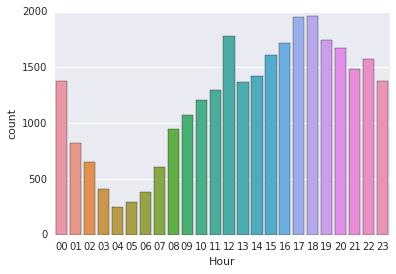

In [31]:
sns.countplot(data=incidents_sa, x='Hour')

### Number of robberies per hour

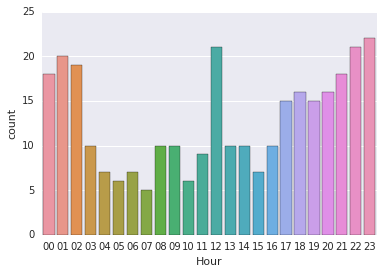

In [24]:
sns.countplot(data=incidents_sa[incidents_sa['Category'] == 'ROBBERY'], x='Hour')

In [52]:
def is_evening(x):
    hour = int(x.split(':')[0])
    if hour > 19 and hour < 23:
        return True
    return False
incidents_sa['Evening'] = incidents_sa['Time'].apply(is_evening)

LARCENY/THEFT                  1836
ASSAULT                         495
VEHICLE THEFT                   463
OTHER OFFENSES                  461
NON-CRIMINAL                    371
WARRANTS                        231
SUSPICIOUS OCC                  176
DRUG/NARCOTIC                   162
MISSING PERSON                  150
SECONDARY CODES                  76
WEAPON LAWS                      61
ROBBERY                          55
DRUNKENNESS                      37
TRESPASS                         23
PROSTITUTION                     23
DRIVING UNDER THE INFLUENCE      22
KIDNAPPING                       18
FRAUD                            16
RUNAWAY                          16
LIQUOR LAWS                      11
ARSON                            11
VANDALISM                         4
DISORDERLY CONDUCT                3
SUICIDE                           2
FORGERY/COUNTERFEITING            2
FAMILY OFFENSES                   2
STOLEN PROPERTY                   1
EMBEZZLEMENT                

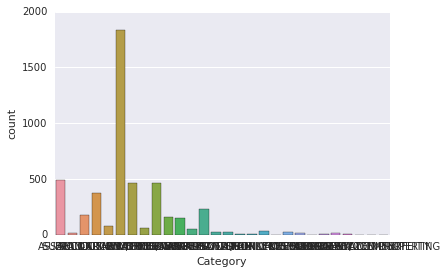

In [53]:
# print(pd.Series(incidents_sa.Category).value_counts())
# print(incidents_sa[incidents_sa['Evening'] == False])
sns.countplot(data=incidents_sa[incidents_sa['Evening'] == True], x='Category')
print(pd.Series(incidents_sa[incidents_sa['Evening'] == True].Category).value_counts())

## Process Seattle

In [72]:
print(incidents_se.columns)
print(pd.unique(incidents_se['Offense Type']))

Index(['RMS CDW ID', 'General Offense Number', 'Offense Code',
       'Offense Code Extension', 'Offense Type', 'Summary Offense Code',
       'Summarized Offense Description', 'Date Reported',
       'Occurred Date or Date Range Start', 'Occurred Date Range End',
       'Hundred Block Location', 'District/Sector', 'Zone/Beat',
       'Census Tract 2000', 'Longitude', 'Latitude', 'Location', 'Month',
       'Year', 'Robbery', 'Hour', 'Evening'],
      dtype='object')
['BURGLARY-FORCE-RES' 'FRAUD-IDENTITY THEFT' 'THEFT-MAIL' 'COUNTERFEIT'
 'THEFT-OTH' 'THEFT-BUILDING' 'FRAUD-CREDIT CARD' 'FRAUD-CHECK' 'EMBEZZLE'
 'BURGLARY-NOFORCE-NONRES' 'FRAUD-OTHER' 'THEFT-CARPROWL' 'HARASSMENT'
 'THEFT-AUTOACC' 'BURGLARY-NOFORCE-RES' 'PROPERTY DAMAGE-NON RESIDENTIA'
 'THEFT-LICENSE PLATE' 'PROPERTY LOST' 'FORGERY-CHECK' 'VEH-THEFT-AUTO'
 'BURGLARY-SECURE PARKING-RES' 'THEFT-PKPOCKET' 'THREATS-OTHER'
 'PROPERTY LOST - POLICE EQUIPME' 'THEFT-BICYCLE'
 'VEH-RCVD-FOR OTHER AGENCY' 'VEH-THEFT-MTRCYCLE' '

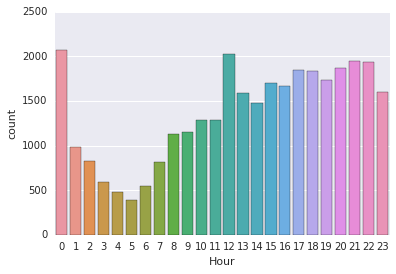

In [62]:
def get_hour(x):
    t = datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p')
    return t.hour
incidents_se['Hour'] = incidents_se['Occurred Date or Date Range Start'].apply(get_hour)
sns.countplot(data=incidents_se, x='Hour')

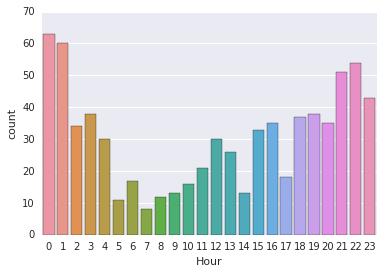

In [63]:
def is_robbery(x):
    if 'ROBBERY' in x:
        return True
    return False
incidents_se['Robbery'] = incidents_se['Offense Type'].apply(is_robbery)
sns.countplot(data=incidents_se[incidents_se['Robbery'] == True], x='Hour')

In [65]:
def is_evening_hour(x):
    if x > 19 and x < 23:
        return True
    return False
incidents_se['Evening'] = incidents_se['Hour'].apply(is_evening_hour)

THEFT-CARPROWL                    1392
VEH-THEFT-AUTO                     774
PROPERTY DAMAGE-NON RESIDENTIA     323
THEFT-OTH                          239
ASSLT-NONAGG                       231
DISTURBANCE-OTH                    197
THEFT-BICYCLE                      164
PROPERTY FOUND                     161
BURGLARY-FORCE-RES                 145
BURGLARY-NOFORCE-RES               134
THEFT-BUILDING                      98
BURGLARY-SECURE PARKING-RES         91
THEFT-SHOPLIFT                      89
PROPERTY DAMAGE-RESIDENTIAL         82
ROBBERY-STREET-BODYFORCE            80
WARRARR-FELONY                      80
ASSLT-AGG-WEAPON                    79
HARASSMENT                          73
WARRARR-MISDEMEANOR                 66
THREATS-OTHER                       61
BURGLARY-FORCE-NONRES               56
PROSTITUTION                        55
PROPERTY DAMAGE - GRAFFITI          55
FRAUD-CREDIT CARD                   51
BURGLARY-NOFORCE-NONRES             50
TRESPASS                 

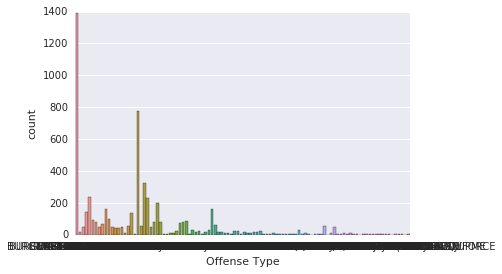

In [69]:
sns.countplot(data=incidents_se[incidents_se['Evening'] == True], x='Offense Type')
print(pd.Series(incidents_se[incidents_se['Evening'] == True]['Offense Type']).value_counts())